In [1]:
!nvidia-smi

Tue Mar 22 12:06:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# ! pip uninstall tensorflow
!pip install tensorflow==2.3.0

     |████████████████████████████████| 320.4 MB 56 kB/s 
     |████████████████████████████████| 2.9 MB 57.1 MB/s 
     |████████████████████████████████| 459 kB 46.7 MB/s 
     |████████████████████████████████| 20.1 MB 777 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalling tensorflow-2.8.0:
 

In [1]:
from tensorflow.python import keras
print(keras.__version__)

2.4.0


In [ ]:
from platform import python_version
print(python_version())

3.7.12


In [2]:
!wget https://www.dropbox.com/s/sgcrugexsz6qh7b/N2_100.zip?dl=0

--2022-03-22 12:09:17--  https://www.dropbox.com/s/sgcrugexsz6qh7b/N2_100.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sgcrugexsz6qh7b/N2_100.zip [following]
--2022-03-22 12:09:17--  https://www.dropbox.com/s/raw/sgcrugexsz6qh7b/N2_100.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc654d032b3a1076b10677d72dd4.dl.dropboxusercontent.com/cd/0/inline/Bh98keoxJpwhPO9KYaURlRJkavL3PkOg9LaluxGUXt_SRlS2pd99yEP6gRX6TN8k2IUVn1qnIzoU1JgFTwbjbqD3NytzycinrvZgSFMbWikRNZ8Uf6G6mHSVuzzKwWySXREq-IEBE4bVwPmjuKn6_hLHicgfuCwAKWaXgLF1i5wXAw/file# [following]
--2022-03-22 12:09:17--  https://uc654d032b3a1076b10677d72dd4.dl.dropboxusercontent.com/cd/0/inline/Bh98keoxJpwhPO9KYaURlRJkavL3PkOg9LaluxGUXt_SRlS2pd99yEP6gRX6TN8k2IUVn

In [3]:
!unzip -q "/content/N2_100.zip?dl=0"

In [4]:
!wget https://www.dropbox.com/s/2wp1z1lx51uftgr/NewUnet.zip?dl=0

--2022-03-22 12:09:49--  https://www.dropbox.com/s/2wp1z1lx51uftgr/NewUnet.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2wp1z1lx51uftgr/NewUnet.zip [following]
--2022-03-22 12:09:49--  https://www.dropbox.com/s/raw/2wp1z1lx51uftgr/NewUnet.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6b15c79d3cc86392e5e300b2a5.dl.dropboxusercontent.com/cd/0/inline/Bh--WogIgmu6CBaBWC2B-xJuomcYAeggZpgjwNB8ibt7cunu_jc9_1b1bYHqSQBZFEJZNYVEKFRfmxpmk8nE-veO0DkjexFKvKyeLGDzYj9Wmg6izpvL3L6cVoJfJXuLMHeNpGqfXNahgIJ-AeCKD29iHR4Z1jlfTv9QGKFH_caAFw/file# [following]
--2022-03-22 12:09:49--  https://uc6b15c79d3cc86392e5e300b2a5.dl.dropboxusercontent.com/cd/0/inline/Bh--WogIgmu6CBaBWC2B-xJuomcYAeggZpgjwNB8ibt7cunu_jc9_1b1bYHqSQBZFE

In [5]:
!unzip -q "/content/NewUnet.zip?dl=0"

In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [4]:
print(tf.__version__)

2.6.0


In [5]:
#New generator with rotation and shear where interpolation that comes with rotation and shear are thresholded in masks. 
#This gives a binary mask rather than a mask with interpolated values. 
seed=24
batch_size = 16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img_data_gen_args = dict(rescale = 1/255.)

mask_data_gen_args = dict(rescale = 1/255.,  #Original pixel values are 0 and 255. So rescaling to 0 to 1
                      preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype)) #Binarize the output again. 

#If You need to resize images then add this to the flow_from_directory parameters 
#target_size=(150, 150), #Or whatever the size is for your network

In [7]:
img_height = 304
img_width = 304

In [8]:
image_data_generator = ImageDataGenerator(**img_data_gen_args)
image_generator = image_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\train_image", 
                                                           seed=seed,
                                                           target_size=(img_height, img_width),
                                                           batch_size=batch_size,
                                                           class_mode=None) #Very important to set this otherwise it returns multiple numpy arrays 
                                                                            #thinking class mode is binary.




mask_data_generator = ImageDataGenerator(**mask_data_gen_args)
mask_generator = mask_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\train_mask", 
                                                         seed=seed,
                                                         target_size=(img_height, img_width),
                                                         batch_size=batch_size,
                                                         color_mode = 'grayscale',   #Read masks in grayscale
                                                         class_mode=None)


valid_img_generator = image_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\val_image", 
                                                               seed=seed,
                                                               target_size=(img_height, img_width),
                                                               batch_size=batch_size, 
                                                               class_mode=None) #Default batch size 32, if not specified here

valid_mask_generator = mask_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\val_mask", 
                                                               seed=seed,
                                                               target_size=(img_height, img_width),
                                                               batch_size=batch_size, 
                                                               color_mode = 'grayscale',   #Read masks in grayscale
                                                               class_mode=None) #Default batch size 32, if not specified here

Found 724 images belonging to 1 classes.
Found 724 images belonging to 1 classes.


C:\Users\Sachin Kumar Jha\.conda\envs\pcb\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


In [9]:
train_generator = zip(image_generator, mask_generator)
val_generator = zip(valid_img_generator, valid_mask_generator)

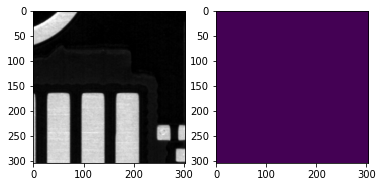

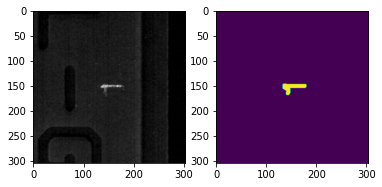

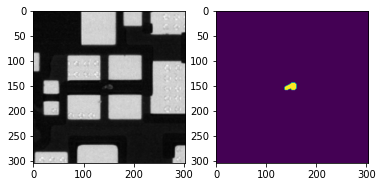

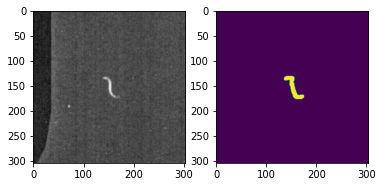

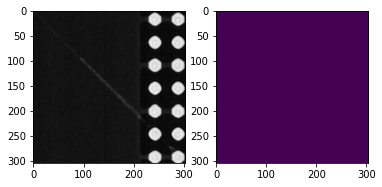

In [10]:
# sanity check
x = image_generator.next()
y = mask_generator.next()
for i in range(0,5):
    image = x[i]
    mask = y[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

In [15]:
IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

In [17]:
#Build Unet using the blocks
def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)  #Binary (can be multiclass)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [18]:
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = build_unet(input_shape)

In [19]:
input_shape

(304, 304, 3)

In [20]:
!pip install focal_loss

In [21]:
from tensorflow.keras import backend as K

def dice_metric(y_pred, y_true):
    intersection = K.sum(K.sum(K.abs(y_true * y_pred), axis=-1))
    union = K.sum(K.sum(K.abs(y_true) + K.abs(y_pred), axis=-1))
    # if y_pred.sum() == 0 and y_pred.sum() == 0:
    #     return 1.0

    return ((2*intersection) / union)

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    
    return (numerator / (denominator + tf.keras.backend.epsilon()))

In [22]:
from focal_loss import BinaryFocalLoss

#model.compile(optimizer=Adam(lr = 1e-3), loss=BinaryFocalLoss(gamma=2), metrics=[dice_metric, 'accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
           #   metrics=[dice_metric])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
              loss=BinaryFocalLoss(gamma=2),
              metrics=[dice_metric, tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
    )


model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 304, 304, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 304, 304, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 304, 304, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 304, 304, 64) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [23]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("/content/New folder/bwUnet_n2.h5",verbose=1,save_best_only=True, monitor='dice_metric', mode='max', save_weights_only = True)
# if false then it will save for every iteration

In [24]:
csv_log = tf.keras.callbacks.CSVLogger(
    'n2_150.csv', separator=',', append=False
)

In [25]:
num_train_imgs = len(os.listdir('/content/NewUnet/train_image/train'))

steps_per_epoch = num_train_imgs //batch_size

In [26]:
num_train_imgs

724

In [27]:
# # # Loading the whole model
# # loaded_model = tf.keras.models.load_model("model.h5")

# # Loading the whole model
loaded_model = tf.keras.models.load_model("/content/New folder/unet_n2_100.h5",custom_objects={"dice_metric": dice_metric})

In [28]:
history = loaded_model.fit(train_generator, validation_data=val_generator, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint, csv_log], 
                    validation_steps=steps_per_epoch, epochs=30)

Epoch 1/30
45/45 [==============================] - ETA: 0s - loss: 0.0013 - dice_metric: 4.8769e-04 - precision: 0.7542 - recall: 0.6242
Epoch 00001: dice_metric improved from -inf to 0.00049, saving model to /content/New folder/bwUnet_n2.h5
45/45 [==============================] - 70s 2s/step - loss: 0.0013 - dice_metric: 4.8769e-04 - precision: 0.7542 - recall: 0.6242 - val_loss: 0.0023 - val_dice_metric: 4.3920e-04 - val_precision: 0.5063 - val_recall: 0.6644
Epoch 2/30
45/45 [==============================] - ETA: 0s - loss: 0.0012 - dice_metric: 4.9940e-04 - precision: 0.7480 - recall: 0.6493
Epoch 00002: dice_metric improved from 0.00049 to 0.00050, saving model to /content/New folder/bwUnet_n2.h5
45/45 [==============================] - 67s 1s/step - loss: 0.0012 - dice_metric: 4.9940e-04 - precision: 0.7480 - recall: 0.6493 - val_loss: 0.0019 - val_dice_metric: 4.5326e-04 - val_precision: 0.7947 - val_recall: 0.4761
Epoch 3/30
45/45 [==============================] - ETA: 0s -

In [30]:
# Saving the best Model

# Load the best weights
loaded_model.load_weights("/content/New folder/bwUnet_n2.h5")

In [31]:
# Save the whole model (weigths + architecture)
loaded_model.save("unet_n2_130.h5")

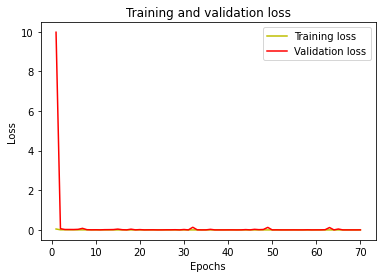

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

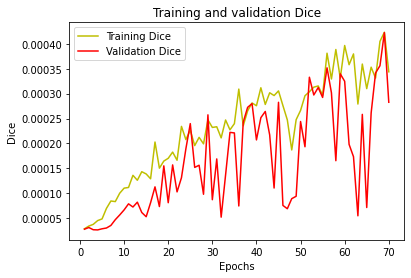

In [ ]:
acc = history.history['dice_metric']
#acc = history.history['accuracy']
val_acc = history.history['val_dice_metric']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Dice')
plt.plot(epochs, val_acc, 'r', label='Validation Dice')
plt.title('Training and validation Dice')
plt.xlabel('Epochs')
plt.ylabel('Dice')
plt.legend()
plt.show()

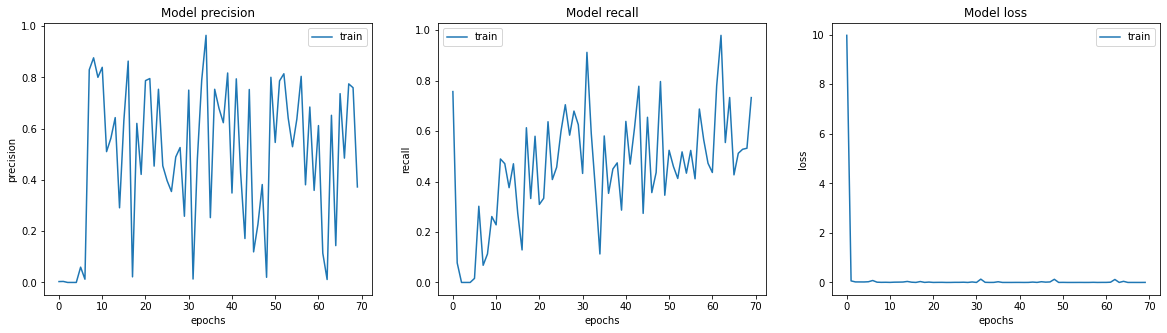

In [ ]:
# Interpreting the Metrics 
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'loss']):
  #  ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
# model.save('unet-binary100Epoch.hdf5')

In [38]:
# # # Loading the whole model
# # loaded_model = tf.keras.models.load_model("model.h5")

# # Loading the whole model
loaded_model2 = tf.keras.models.load_model("unet_n2_130.h5",custom_objects={"dice_metric": dice_metric})

In [39]:
history2 = loaded_model2.fit(train_generator, validation_data=val_generator, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint, csv_log], 
                    validation_steps=steps_per_epoch, epochs=30)

Epoch 1/30
45/45 [==============================] - ETA: 0s - loss: 9.9390e-04 - dice_metric: 6.0311e-04 - precision: 0.7775 - recall: 0.7038
Epoch 00001: dice_metric did not improve from 0.00069
45/45 [==============================] - 67s 1s/step - loss: 9.9390e-04 - dice_metric: 6.0311e-04 - precision: 0.7775 - recall: 0.7038 - val_loss: 0.0019 - val_dice_metric: 4.7366e-04 - val_precision: 0.6010 - val_recall: 0.6877
Epoch 2/30
45/45 [==============================] - ETA: 0s - loss: 0.0012 - dice_metric: 5.2488e-04 - precision: 0.7588 - recall: 0.6226
Epoch 00002: dice_metric did not improve from 0.00069
45/45 [==============================] - 66s 1s/step - loss: 0.0012 - dice_metric: 5.2488e-04 - precision: 0.7588 - recall: 0.6226 - val_loss: 0.0034 - val_dice_metric: 3.3558e-04 - val_precision: 0.3870 - val_recall: 0.7470
Epoch 3/30
45/45 [==============================] - ETA: 0s - loss: 0.0012 - dice_metric: 5.9278e-04 - precision: 0.7769 - recall: 0.6247
Epoch 00003: dice_me

In [ ]:
# F1t = 2*((prect*rect)/(prect+rect))
# F1t

In [40]:
# Saving the best Model

# Load the best weights
loaded_model2.load_weights("/content/New folder/bwUnet_n2.h5")

In [41]:
# Save the whole model (weigths + architecture)
loaded_model2.save("unet_n2_160.h5")

In [11]:
modeln = tf.keras.models.load_model("unet_n2_160.h5", compile=False)

test_img_generator = image_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\test_image", 
                                                              seed=seed,
                                                              target_size=(img_height, img_width), 
                                                              batch_size=16, 
                                                              class_mode=None) #Default batch size 32, if not specified here

test_mask_generator = mask_data_generator.flow_from_directory("E:\\U_net\\UD\\NewUnet\\test_mask", 
                                                              seed=seed,
                                                              target_size=(img_height, img_width), 
                                                              batch_size=16, 
                                                              color_mode = 'grayscale',   #Read masks in grayscale
                                                              class_mode=None)  #Default batch size 32, if not specified here


Found 100 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


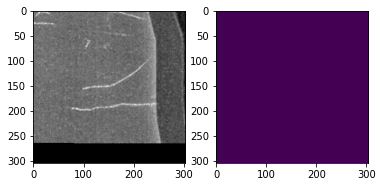

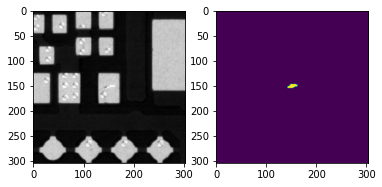

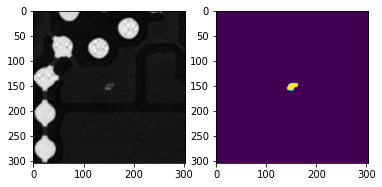

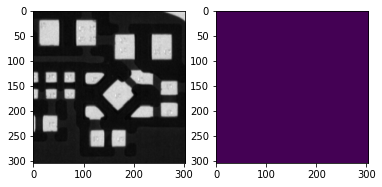

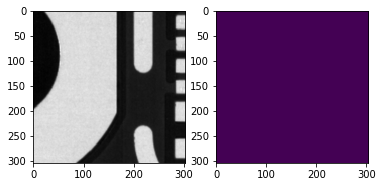

In [12]:
### Testing on a few test images

a = test_img_generator.next()
b = test_mask_generator.next()
for i in range(0,5):
    image = a[i]
    mask = b[i]
    plt.subplot(1,2,1)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

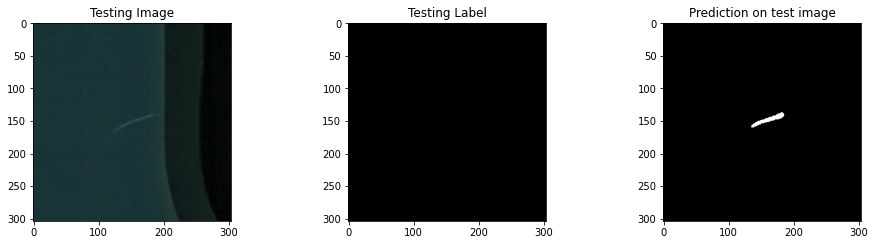

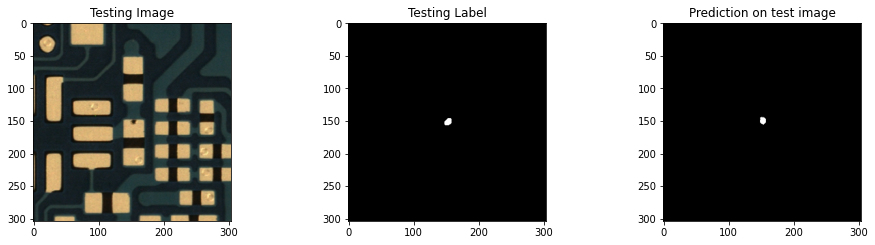

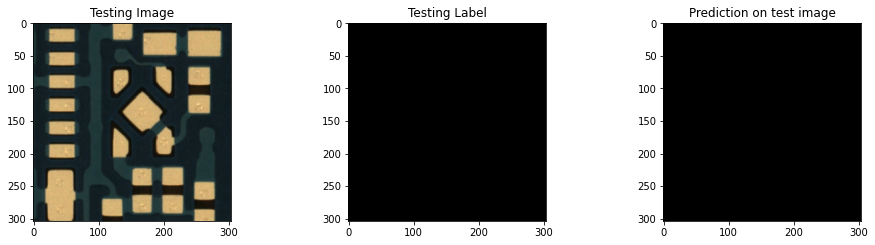

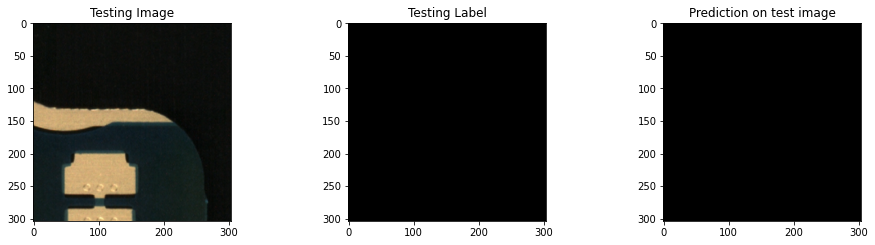

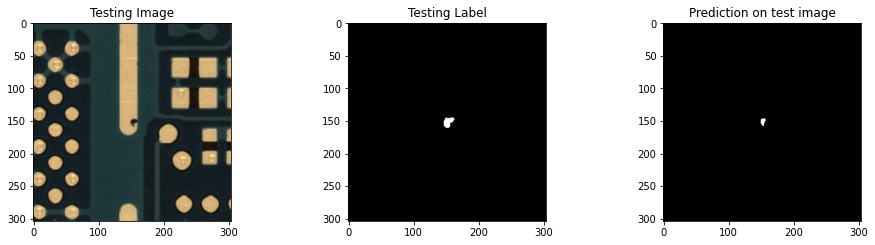

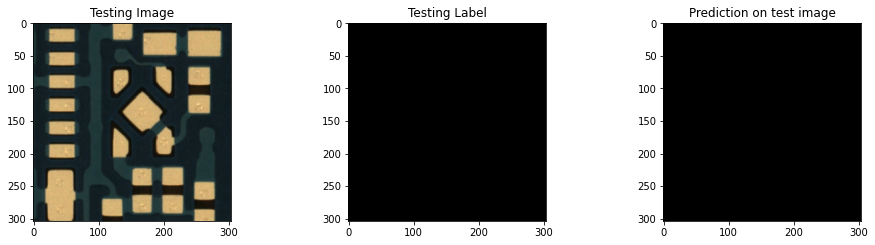

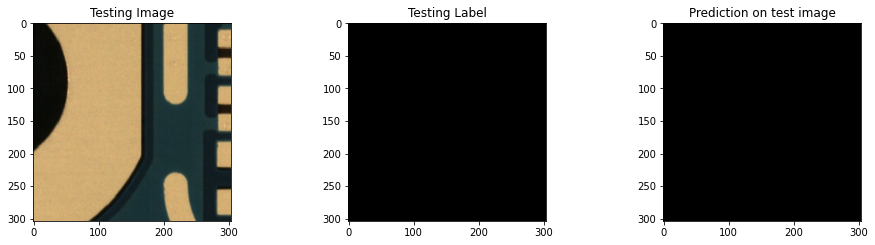

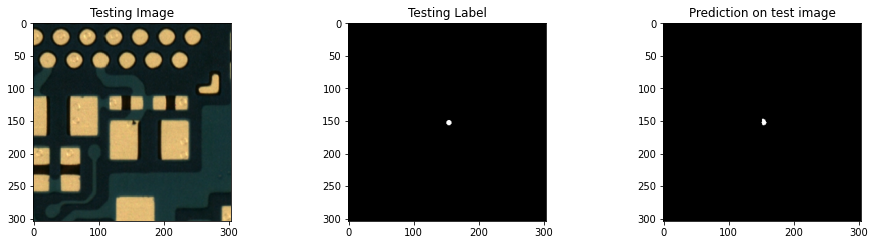

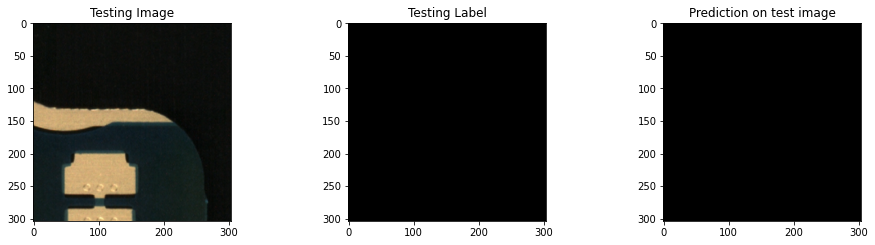

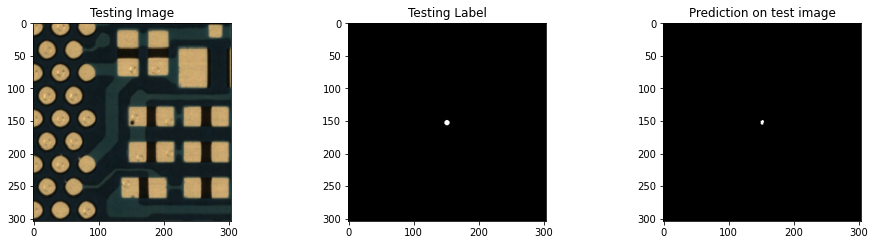

In [13]:
import random
i = 0
while i < 10:
  test_img_number = random.randint(0, a.shape[0]-1)
  test_img = a[test_img_number]
  ground_truth=b[test_img_number]
  #test_img_norm=test_img[:,:,0][:,:,None]
  test_img_input=np.expand_dims(test_img, 0)
  prediction = (modeln.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)

  plt.figure(figsize=(16, 8))
  plt.subplot(231)
  plt.title('Testing Image')
  plt.imshow(test_img, cmap='gray')
  plt.subplot(232)
  plt.title('Testing Label')
  plt.imshow(ground_truth[:,:,0], cmap='gray')
  plt.subplot(233)
  plt.title('Prediction on test image')
  plt.imshow(prediction, cmap='gray')

  plt.show()

  i += 1

In [14]:
#IoU for a single image
from tensorflow.keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(ground_truth[:,:,0], prediction)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.4998485


In [15]:
(2*IOU_keras.result().numpy())/(1+IOU_keras.result().numpy()) #dice metric

0.6665319995513304

In [16]:
#Calculate IoU and average
import pandas as pd

IoU_values = []
Dice = []
for img in range(0, a.shape[0]):
    temp_img = a[img]
    ground_truth=b[img]
    temp_img_input=np.expand_dims(temp_img, 0)
    prediction = (modeln.predict(temp_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
    
    IoU = MeanIoU(num_classes=n_classes)
    IoU.update_state(ground_truth[:,:,0], prediction)
    IoU = IoU.result().numpy()
    IoU_values.append(IoU)

    D = (2*IOU_keras.result().numpy())/(1+IOU_keras.result().numpy())
    Dice.append(D)

    print(IoU, D)
    


df = pd.DataFrame(IoU_values, columns=["IoU"])
df = df[df.IoU != 1.0]    
mean_IoU = df.mean().values
print("Mean IoU is: ", mean_IoU)    

0.4856897 0.6665319995513304
0.49982688 0.6665319995513304
0.49870694 0.6665319995513304
1.0 0.6665319995513304
1.0 0.6665319995513304
1.0 0.6665319995513304
1.0 0.6665319995513304
0.49954554 0.6665319995513304
0.4998485 0.6665319995513304
0.49970242 0.6665319995513304
0.49817672 0.6665319995513304
0.4996862 0.6665319995513304
0.49966457 0.6665319995513304
0.49482775 0.6665319995513304
1.0 0.6665319995513304
1.0 0.6665319995513304
Mean IoU is:  [0.49756756]
